In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# to see all the columns
pd.set_option("max_columns", None)

## Meta Data Check

In [3]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the percentage of the missing values in columns
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [5]:
df.shape

(9240, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Preprocessing

In [7]:
# Checking the unique values in the columns
# we will delete the columns which have only one value throught the data as they have no special information
df_count=pd.DataFrame(df.nunique(),columns=['Unique_Value'])
df_unique_count=df_count[df_count.Unique_Value==1]
df_binary_count=df_count[df_count.Unique_Value==2]
df_count.head()

,Unique_Value
Prospect ID,9240
Lead Number,9240
Lead Origin,5
Lead Source,21
Do Not Email,2


In [8]:
# Columns with unique values are given below
df_unique_count

,Unique_Value
Magazine,1
Receive More Updates About Our Courses,1
Update me on Supply Chain Content,1
Get updates on DM Content,1
I agree to pay the amount through cheque,1


In [9]:
# Columns with binary values are given below
df_binary_count

,Unique_Value
Do Not Email,2
Do Not Call,2
Converted,2
Search,2
Newspaper Article,2
X Education Forums,2
Newspaper,2
Digital Advertisement,2
Through Recommendations,2
A free copy of Mastering The Interview,2


In [10]:
# dropping columns which do not have additional information to provide
df.drop(labels=list(df_unique_count.index),axis=1,inplace=True)

In [11]:
# Creating a list of binary value columns without "Converted" column in it  
df_binary_columns=[i for i in list(df_binary_count.index) if i!='Converted']

In [12]:
df[df_binary_columns].head(10)

,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,Yes
3,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No
5,No,No,No,No,No,No,No,No,No
6,No,No,No,No,No,No,No,No,No
7,No,No,No,No,No,No,No,No,No
8,No,No,No,No,No,No,No,No,Yes
9,No,No,No,No,No,No,No,No,No


In [13]:
# Converting yes in 1 and No in 0 for binary value columns except for the converted column
df[df_binary_columns]=df[df_binary_columns].applymap(lambda x:1 if x=='Yes' else 0)

In [14]:
df[df_binary_columns].head(10)

,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0


In [15]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Email Opened


In [16]:
# Checking the percentage of the missing values in columns
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [17]:
# replacing the select entries in all the columns with null entries
df=df.replace(['Select'],[np.nan])

In [18]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,Email Opened


In [19]:
 #Checking the percentage of null entries after replacing the select with null
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [20]:
# City seems to be important variable as well even if it has mutlitple missing values
df.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [21]:
# removing the columns which have more than 30% missing blank/null values
columns_to_drop=list((df.isnull().sum()/df.shape[0])[(df.isnull().sum()/df.shape[0])>0.30].index)
columns_to_drop

['Specialization',
 'How did you hear about X Education',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [22]:
# dropping all the columns which have more than 30% missing entries except specialization
df=df.drop(labels=[col for col in columns_to_drop if col not in ['Specialization','City']],axis=1)

In [23]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,NaN,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,NaN,0,Email Opened


In [24]:
# Checking the percentage of null entries
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [25]:
# checking the data types of the columns where we will be doing the missing value imputations
col_with_missing_values=list((df.isnull().sum()/df.shape[0])[(df.isnull().sum()/df.shape[0])>0].index)
df[col_with_missing_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Source                                    9204 non-null   object 
 1   TotalVisits                                    9103 non-null   float64
 2   Page Views Per Visit                           9103 non-null   float64
 3   Last Activity                                  9137 non-null   object 
 4   Country                                        6779 non-null   object 
 5   Specialization                                 5860 non-null   object 
 6   What is your current occupation                6550 non-null   object 
 7   What matters most to you in choosing a course  6531 non-null   object 
 8   City                                           5571 non-null   object 
dtypes: float64(2), object(7)
memory usage: 649.8+ KB


In [26]:
# Missing values percentage to check
(df.isnull().sum()/df.shape[0])[(df.isnull().sum()/df.shape[0])>0]

Lead Source                                      0.003896
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
City                                             0.397078
dtype: float64

In [27]:
#For country we can assume the country to be "India" for the missing values i.e with mode
df_country=pd.DataFrame((df.Country.value_counts()/df.shape[0])*100)
df_country.head(10)

,Country
India,70.259740
United States,0.746753
United Arab Emirates,0.573593
Singapore,0.259740
Saudi Arabia,0.227273
United Kingdom,0.162338
Australia,0.140693
Qatar,0.108225
Hong Kong,0.075758
Bahrain,0.075758


In [28]:
#For City we can assume the City to be "Missing City"
df_city=pd.DataFrame((df.City.value_counts()/df.shape[0])*100)
df_city.head(10)

,City
Mumbai,34.870130
Thane & Outskirts,8.138528
Other Cities,7.424242
Other Cities of Maharashtra,4.945887
Other Metro Cities,4.112554
Tier II Cities,0.800866


In [29]:
# For specialization we can impute the values with term as "missing specialization" as there is no particular specialization which has very high percentage 
df_specialization=pd.DataFrame((df.Specialization.value_counts()/df.shape[0])*100)
df_specialization.head(10)

,Specialization
Finance Management,10.562771
Human Resource Management,9.177489
Marketing Management,9.069264
Operations Management,5.443723
Business Administration,4.361472
IT Projects Management,3.961039
Supply Chain Management,3.777056
"Banking, Investment And Insurance",3.658009
Media and Advertising,2.196970
Travel and Tourism,2.196970


In [30]:
# combining management specialization by using regex 
import re
def management_check(string):
    pattern="Management"
    result=re.search(pattern,str(string))
    if result!=None:
        return 'Management_Specializations'
    else:
        return string
    
df.Specialization=df.Specialization.apply(lambda x : management_check(x))

df.Specialization.unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Management_Specializations', 'Travel and Tourism',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Services Excellence', 'Rural and Agribusiness',
       'E-Business'], dtype=object)

In [31]:
# For occupation we can impute the values with term as "missing occupation" 
df_occupation=pd.DataFrame((df["What is your current occupation"].value_counts()/df.shape[0])*100)
df_occupation

,What is your current occupation
Unemployed,60.606061
Working Professional,7.640693
Student,2.272727
Other,0.173160
Housewife,0.108225
Businessman,0.086580


In [32]:
# For reason for choosing the course we can impute the missing values with term as "Better career prospects" i.e with mode
df_reason=pd.DataFrame((df["What matters most to you in choosing a course"].value_counts()/df.shape[0])*100)
df_reason

,What matters most to you in choosing a course
Better Career Prospects,70.649351
Flexibility & Convenience,0.021645
Other,0.010823


## Missing Value Imputation

In [33]:
# replacing the missing values in "What matters most to you in choosing a course" , Country  with mode
df["What matters most to you in choosing a course"].fillna(value=df["What matters most to you in choosing a course"].mode()[0],inplace=True)
df.Country.fillna(value=df.Country.mode()[0],inplace=True)


# replacing the missing values in Lead Score & Last activity by mode

df["Lead Source"].fillna(value=df["Lead Source"].mode()[0],inplace=True)
df["Last Activity"].fillna(value=df["Last Activity"].mode()[0],inplace=True)

# replacing the missing values in Total Visits & Page Views Per Visit by median
df.TotalVisits.fillna(value=df.TotalVisits.median(),inplace=True)
df["Page Views Per Visit"].fillna(value=df["Page Views Per Visit"].median(),inplace=True)

In [34]:
# Replacing the Missing Occupation and sepcialization in the respective columns
df["What is your current occupation"]=df["What is your current occupation"].fillna("Missing Occupation")
df.Specialization=df.Specialization.fillna("Missing Specialization")
df.City=df.City.fillna("Missing City")

In [35]:
# Missing values percentage to check
(df.isnull().sum()/df.shape[0])[(df.isnull().sum()/df.shape[0])>0]

Series([], dtype: float64)

In [36]:
# percentage of rows retained => 100%
df.shape

(9240, 24)

## Exploratory Data Analysis

#### Univariate Analysis

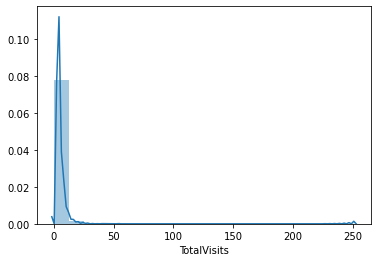

In [37]:
# Checking the histogram distribution of Contiunous numericalvariables
# Most of the people have visited not more than 20 to 30 times

sns.distplot(df.TotalVisits,bins=20)
plt.show()

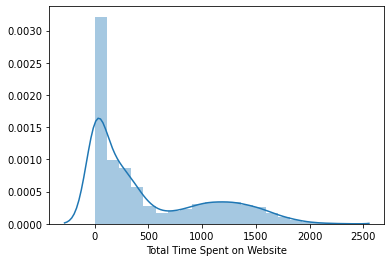

In [38]:
# There is reducing trend in the time that is spent by the people on website
sns.distplot(df['Total Time Spent on Website'],bins=20)
plt.show()

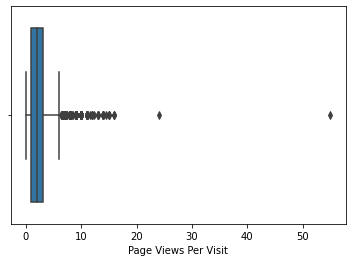

In [39]:
# Mostof the people do not watch the page more than 8-10 times per visit
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [40]:
# We can think of dropping the outliers here who visited the multiple times
# However we may loose important indicators of the people who turned out to be paying customers based upon below given analysis
# So we will not remove any of the outliers
df_1=df[df['Page Views Per Visit']>8]
df_1.Converted.value_counts()

0    74
1    49
Name: Converted, dtype: int64

#### Bi Variate Analysis

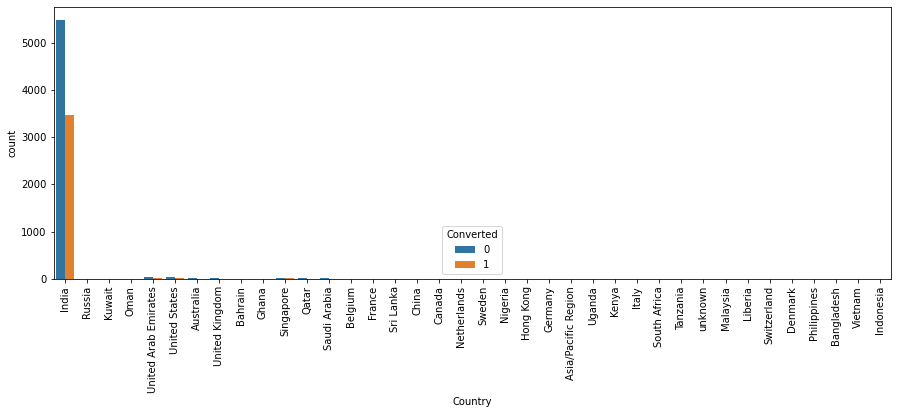

In [41]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [42]:
df["Country"].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Kuwait                     4
Canada                     4
Germany                    4
Nigeria                    4
Sweden                     3
Belgium                    2
Netherlands                2
Uganda                     2
Ghana                      2
Asia/Pacific Region        2
Italy                      2
Philippines                2
Bangladesh                 2
China                      2
Indonesia                  1
Tanzania                   1
Liberia                    1
Malaysia                   1
Denmark                    1
Switzerland                1
Sri Lanka     

In [43]:
#Grouping the variable
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "unknown":
        category = "not provided"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']), axis = 1)
df['Country'].value_counts()

India            8953
outside india     282
not provided        5
Name: Country, dtype: int64

In [44]:
# This basically means that the country is not adding much information and so we will drop it 
df.drop(['Country'],axis=1,inplace=True)

In [45]:
# Rechecking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [46]:
# To familiarize all the categorical values
for column in df:
    print(df[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Ad

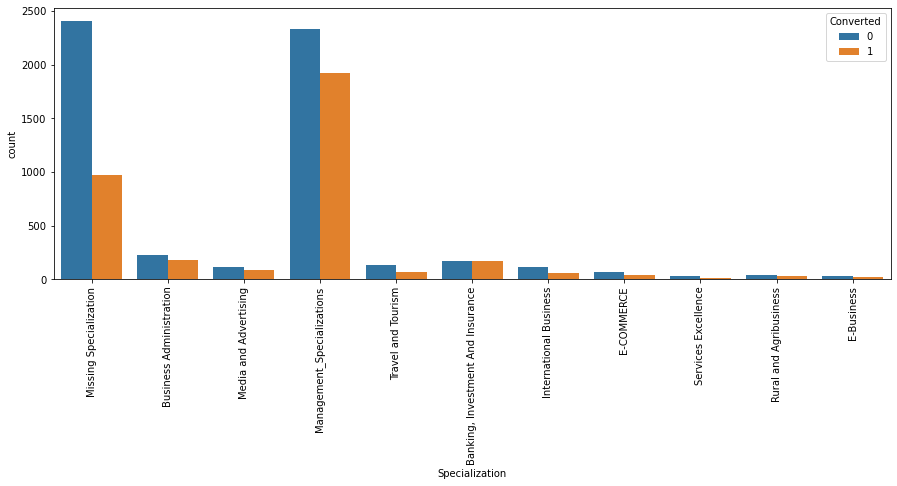

In [47]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

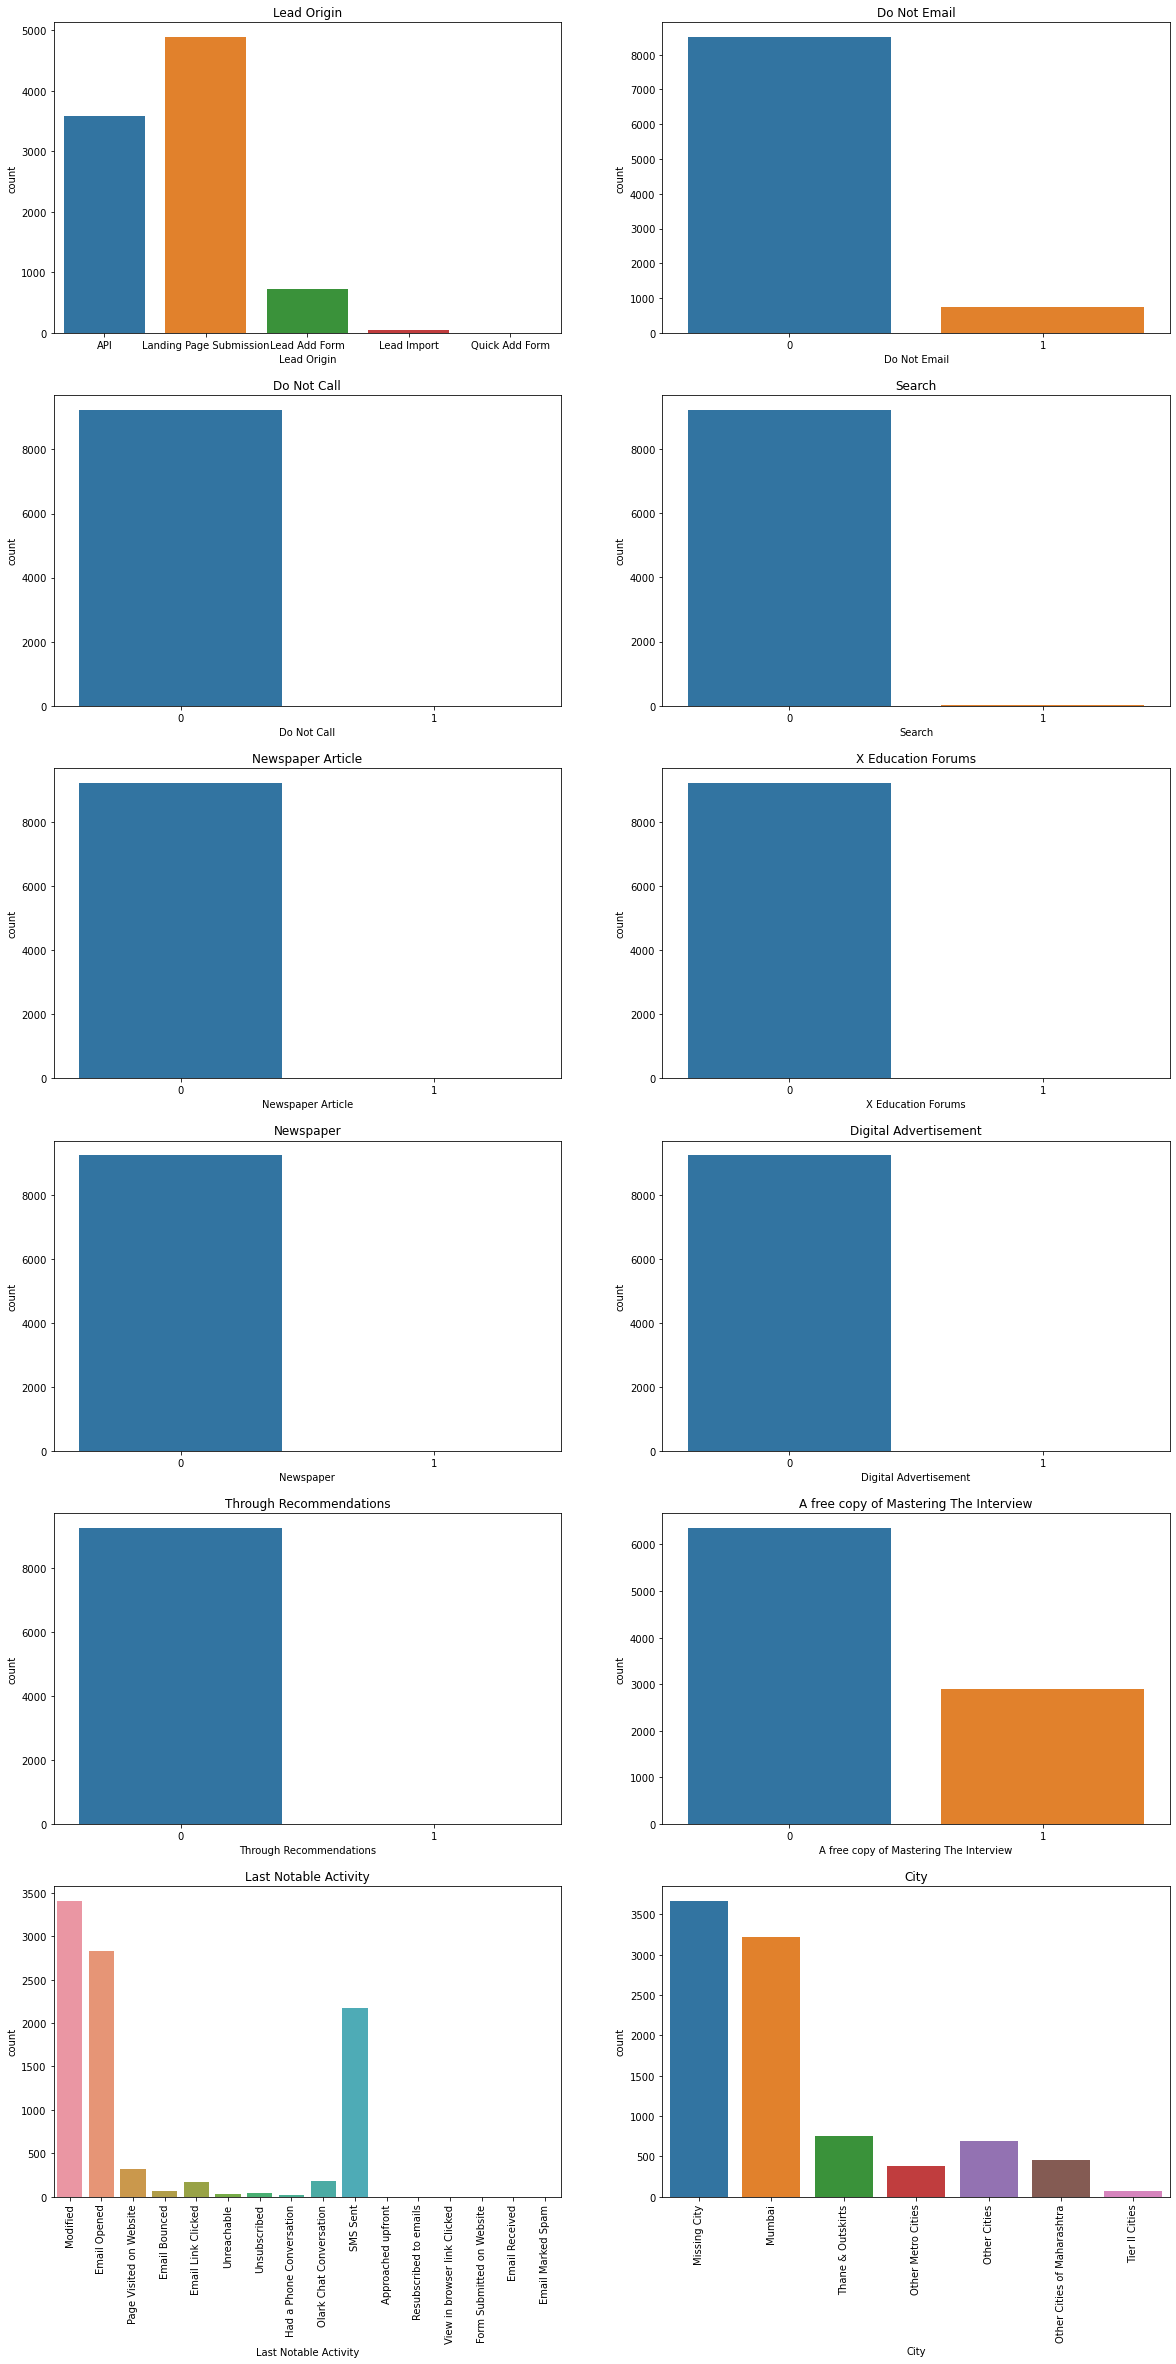

In [48]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df['Search'])
plt.title('Search')

plt.subplot(6,2,5)
sns.countplot(df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,6)
sns.countplot(df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,7)
sns.countplot(df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,8)
sns.countplot(df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,9)
sns.countplot(df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,10)
sns.countplot(df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,11)
sns.countplot(df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(6,2,12)
sns.countplot(df['City']).tick_params(axis='x', rotation = 90)
plt.title('City')

plt.show()

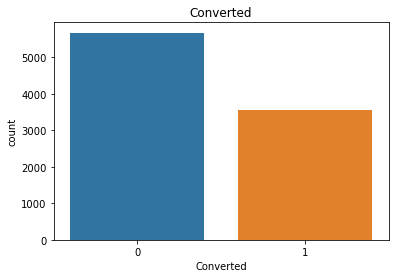

In [49]:
#Visualising converted data
sns.countplot(df['Converted'])
plt.title('Converted')
plt.show()

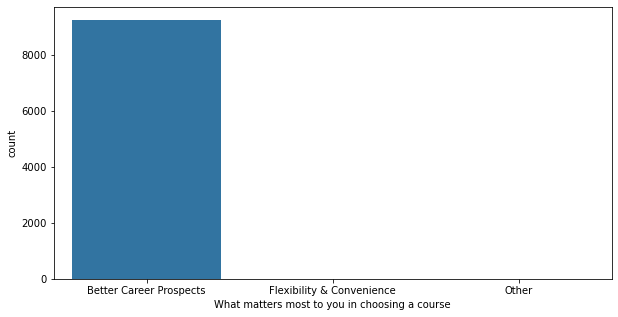

In [50]:
#Visualising What matter most against Converted
plt.figure(figsize=[10,5])
sns.countplot(df['What matters most to you in choosing a course'])
plt.show()

In [51]:
# What matters most is most of the times filled as better career prospects so we can drop it 
df.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

#### Multivariate Analysis

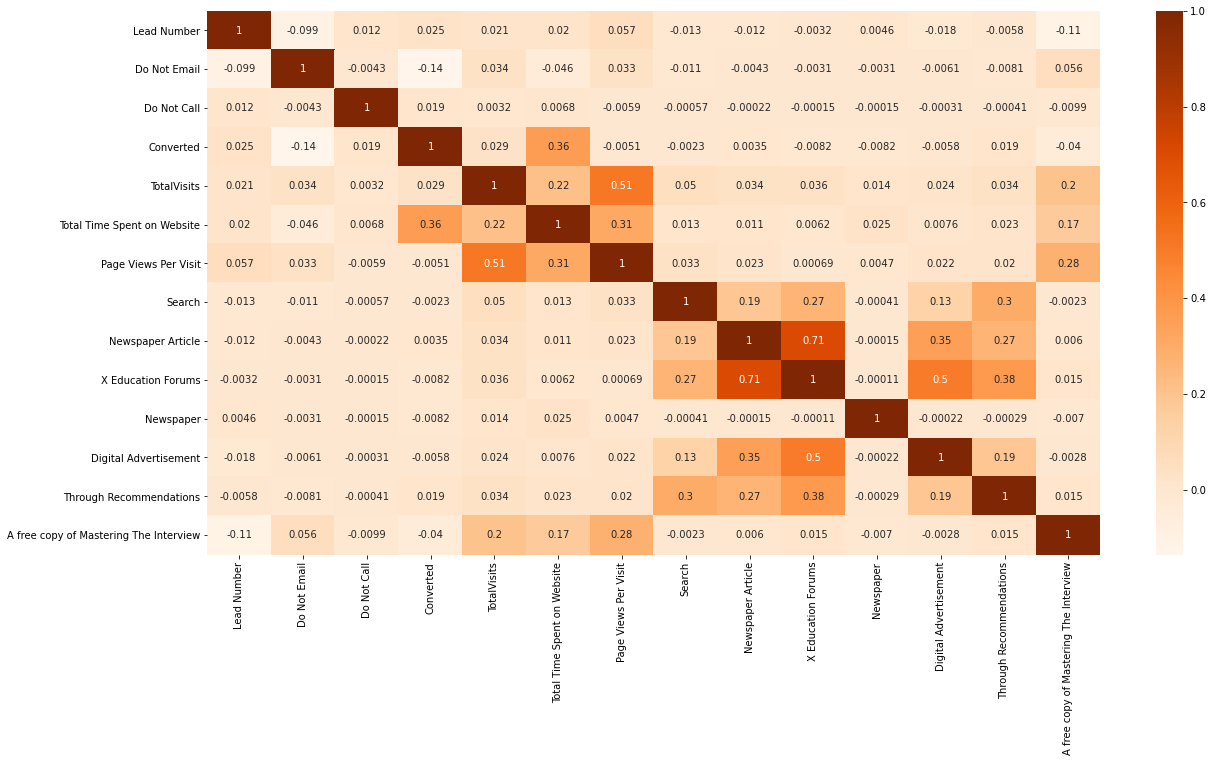

In [52]:
# To check the correlation among varibles
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Oranges',)
plt.show()

# Total time spent on website seems to be the most correlated variable with our target variable and is logical as well

In [53]:
object_col=df.loc[:, df.dtypes == 'object'].columns
object_col=[col for col in object_col if col not in ['Prospect ID']]
object_col

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'City',
 'Last Notable Activity']

In [54]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Missing Specialization,Unemployed,0,0,0,0,0,0,Missing City,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Missing Specialization,Unemployed,0,0,0,0,0,0,Missing City,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Missing Specialization,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified


#### Dummy Variable Creation

In [55]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df[object_col], drop_first=True)
# Add the results to the master dataframe
df_dum = pd.concat([df, dummy], axis=1)
df_dum.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Missing Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing Occupation,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Missing Specialization,Unemployed,0,0,0,0,0,0,Missing City,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Missing Specialization,Unemployed,0,0,0,0,0,0,Missing City,0,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Mumbai,1,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified

In [56]:
df_dum = df_dum.drop(object_col,axis=1)
df_dum.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Missing Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing Occupation,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [57]:
# Before going ahead let us check prospect ID and Lead Number - In case they are unqiue we will have to drop them
print(df_dum['Prospect ID'].nunique(),',',df_dum['Lead Number'].nunique(),',',df_dum.shape)

9240 , 9240 , (9240, 92)


In [58]:
# Basically from above it is clear that the prosepct id and the lead number are unique 
# let us remove them and store them in another dataframe
df_id=df_dum[['Prospect ID','Lead Number']]
df=df_dum.drop(['Prospect ID','Lead Number'],axis=1)

In [59]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Missing Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing Occupation,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Train Test Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X=df.drop('Converted',axis=1)
y=df.Converted

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

#### Scaling the Train Data

In [63]:
# Importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [64]:
varlist=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [65]:
Scaler=MinMaxScaler()

In [66]:
# Scaling the data
X_train[varlist]=Scaler.fit_transform(X_train[varlist])

In [67]:
# As we see there are approximately 89 columns
len(X_train.columns)

89

#### Model Building

In [68]:
# We will use hybrid approch where we will use manual as well as automated approach
# Importing logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [69]:
# Importing Recursive Feature Elimination
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [70]:
# Checking the features which are selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Missing Specialization',
       'What is your current occupation_Housewife',
       'What is your current occupation_Missing Occupation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [71]:
# Now importing the stats models to assess the model
import statsmodels.api as sm


In [72]:
# Model 1 - it is clear we have to drop few insignificant features however before that we will check VIF as well
X_train_sm=sm.add_constant(X_train[col])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res1=logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.3
Date:                Sat, 19 Nov 2022   Deviance:                       5292.6
Time:                        13:05:31   Pearson chi2:                 7.36e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4549      0.138    -10.576      0.000      -1.725      -1.185
Do Not Email                                            -1.3279      0.167     -7.942      0.000      -1.656      -1.000
TotalVisits                                              6.7185      1.891      3.553      0.000       3.013      10.424
Total Time Spent on Website                              4.4478      0.165     26.886      0.000       4.124       4.772
Lead Origin_Landing Page Submission                     -0.9862      0.127     -7.755      0.000      -1.236      -0.737
Lead Origin_Lead Add Form                                3.0043      0.205     14.664      0.000       2.603       3.406
Lead Source_Olark Chat                                   1.0861      0.123      8.849      0.000       0.846       1.327
Lead Source_Welingak Website                             2.4551      0.746      3.289      0.001       0.992       3.918
Last Activity_Had a Phone Conversation                   0.6915      0.973      0.711      0.477      -1.215       2.598
Last Activity_SMS Sent                                   1.4598      0.074     19.805      0.000       1.315       1.604
Specialization_Missing Specialization                   -0.9630      0.122     -7.910      0.000      -1.202      -0.724
What is your current occupation_Housewife               22.9262   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Missing Occupation      -1.1372      0.087    -13.070      0.000      -1.308      -0.967
What is your current occupation_Working Professional     2.4306      0.190     12.763      0.000       2.057       2.804
Last Notable Activity_Had a Phone Conversation           2.8969      1.495      1.938      0.053      -0.033       5.827
Last Notable Activity_Unreachable                        2.0547      0.550      3.737      0.000       0.977       3.133
========================================================================================================================
"""

In [73]:
# Checking VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']= [variance_inflation_factor(X_train[col].values,i) for i in range (X_train[col].shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
3,Lead Origin_Landing Page Submission,2.46
9,Specialization_Missing Specialization,2.35
7,Last Activity_Had a Phone Conversation,2.02
13,Last Notable Activity_Had a Phone Conversation,2.01
2,Total Time Spent on Website,1.97
5,Lead Source_Olark Chat,1.81
11,What is your current occupation_Missing Occupa...,1.59
1,TotalVisits,1.56
8,Last Activity_SMS Sent,1.50
4,Lead Origin_Lead Add Form,1.43


In [74]:
# Model 2 - We will drop Occupation of Housewife as it is the most insignificant 
col= col.drop('What is your current occupation_Housewife')

In [75]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res2=logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.3
Date:                Sat, 19 Nov 2022   Deviance:                       5306.5
Time:                        13:05:31   Pearson chi2:                 7.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4451      0.137    -10.516      0.000      -1.714      -1.176
Do Not Email                                            -1.3330      0.167     -7.975      0.000      -1.661      -1.005
TotalVisits                                              6.6130      1.886      3.507      0.000       2.917      10.309
Total Time Spent on Website                              4.4436      0.165     26.894      0.000       4.120       4.767
Lead Origin_Landing Page Submission                     -0.9809      0.127     -7.719      0.000      -1.230      -0.732
Lead Origin_Lead Add Form                                3.0181      0.205     14.749      0.000       2.617       3.419
Lead Source_Olark Chat                                   1.0836      0.123      8.834      0.000       0.843       1.324
Lead Source_Welingak Website                             2.4394      0.746      3.268      0.001       0.976       3.902
Last Activity_Had a Phone Conversation                   0.6843      0.973      0.703      0.482      -1.223       2.591
Last Activity_SMS Sent                                   1.4515      0.074     19.714      0.000       1.307       1.596
Specialization_Missing Specialization                   -0.9669      0.122     -7.947      0.000      -1.205      -0.728
What is your current occupation_Missing Occupation      -1.1411      0.087    -13.124      0.000      -1.312      -0.971
What is your current occupation_Working Professional     2.4216      0.190     12.721      0.000       2.048       2.795
Last Notable Activity_Had a Phone Conversation           2.8939      1.495      1.936      0.053      -0.037       5.824
Last Notable Activity_Unreachable                        2.0469      0.550      3.722      0.000       0.969       3.125
========================================================================================================================
"""

In [76]:
# Checking VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']= [variance_inflation_factor(X_train[col].values,i) for i in range (X_train[col].shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
3,Lead Origin_Landing Page Submission,2.46
9,Specialization_Missing Specialization,2.35
7,Last Activity_Had a Phone Conversation,2.02
12,Last Notable Activity_Had a Phone Conversation,2.01
2,Total Time Spent on Website,1.97
5,Lead Source_Olark Chat,1.81
10,What is your current occupation_Missing Occupa...,1.59
1,TotalVisits,1.56
8,Last Activity_SMS Sent,1.50
4,Lead Origin_Lead Add Form,1.42


In [77]:
# Model 3 - We will drop Last Activity_Had a Phone Conversation as it is the most insignificant 
col= col.drop('Last Activity_Had a Phone Conversation')

In [78]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res3=logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.5
Date:                Sat, 19 Nov 2022   Deviance:                       5307.0
Time:                        13:05:31   Pearson chi2:                 7.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4442      0.137    -10.510      0.000      -1.714      -1.175
Do Not Email                                            -1.3333      0.167     -7.975      0.000      -1.661      -1.006
TotalVisits                                              6.6034      1.885      3.503      0.000       2.908      10.299
Total Time Spent on Website                              4.4461      0.165     26.913      0.000       4.122       4.770
Lead Origin_Landing Page Submission                     -0.9811      0.127     -7.720      0.000      -1.230      -0.732
Lead Origin_Lead Add Form                                3.0202      0.205     14.761      0.000       2.619       3.421
Lead Source_Olark Chat                                   1.0825      0.123      8.827      0.000       0.842       1.323
Lead Source_Welingak Website                             2.4365      0.746      3.264      0.001       0.974       3.899
Last Activity_SMS Sent                                   1.4502      0.074     19.701      0.000       1.306       1.594
Specialization_Missing Specialization                   -0.9663      0.122     -7.943      0.000      -1.205      -0.728
What is your current occupation_Missing Occupation      -1.1411      0.087    -13.124      0.000      -1.311      -0.971
What is your current occupation_Working Professional     2.4251      0.190     12.746      0.000       2.052       2.798
Last Notable Activity_Had a Phone Conversation           3.5775      1.136      3.148      0.002       1.350       5.805
Last Notable Activity_Unreachable                        2.0459      0.550      3.720      0.000       0.968       3.124
========================================================================================================================
"""

In [79]:
# Checking VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']= [variance_inflation_factor(X_train[col].values,i) for i in range (X_train[col].shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
3,Lead Origin_Landing Page Submission,2.46
8,Specialization_Missing Specialization,2.35
2,Total Time Spent on Website,1.97
5,Lead Source_Olark Chat,1.81
9,What is your current occupation_Missing Occupa...,1.59
1,TotalVisits,1.56
7,Last Activity_SMS Sent,1.50
4,Lead Origin_Lead Add Form,1.42
6,Lead Source_Welingak Website,1.27
10,What is your current occupation_Working Profes...,1.21


In [80]:
# Model 4 - We will drop Lead Origin_Landing Page Submission it is having high vif(above 2)& it will help us reducing the variables as well
col= col.drop('Lead Origin_Landing Page Submission')

In [81]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res4=logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2684.0
Date:                Sat, 19 Nov 2022   Deviance:                       5368.0
Time:                        13:05:32   Pearson chi2:                 6.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2991      0.085    -27.086      0.000      -2.465      -2.133
Do Not Email                                            -1.3809      0.166     -8.344      0.000      -1.705      -1.057
TotalVisits                                              6.2815      1.866      3.366      0.001       2.624       9.939
Total Time Spent on Website                              4.5142      0.165     27.401      0.000       4.191       4.837
Lead Origin_Lead Add Form                                3.5971      0.191     18.814      0.000       3.222       3.972
Lead Source_Olark Chat                                   1.4150      0.116     12.234      0.000       1.188       1.642
Lead Source_Welingak Website                             2.1162      0.745      2.841      0.005       0.656       3.576
Last Activity_SMS Sent                                   1.4062      0.073     19.294      0.000       1.263       1.549
Specialization_Missing Specialization                   -0.3110      0.086     -3.599      0.000      -0.480      -0.142
What is your current occupation_Missing Occupation      -1.1781      0.086    -13.637      0.000      -1.347      -1.009
What is your current occupation_Working Professional     2.4762      0.187     13.268      0.000       2.110       2.842
Last Notable Activity_Had a Phone Conversation           3.6240      1.120      3.236      0.001       1.429       5.819
Last Notable Activity_Unreachable                        2.1309      0.541      3.942      0.000       1.071       3.190
========================================================================================================================
"""

In [82]:
# Checking VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']= [variance_inflation_factor(X_train[col].values,i) for i in range (X_train[col].shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
7,Specialization_Missing Specialization,2.11
4,Lead Source_Olark Chat,1.81
2,Total Time Spent on Website,1.61
8,What is your current occupation_Missing Occupa...,1.46
3,Lead Origin_Lead Add Form,1.41
1,TotalVisits,1.38
6,Last Activity_SMS Sent,1.38
5,Lead Source_Welingak Website,1.26
9,What is your current occupation_Working Profes...,1.21
0,Do Not Email,1.07


In [83]:
# Model 5 - We will drop Specialization_Missing Specialization it is having high vif(above 2) & it will help us reducing the variables as well
col= col.drop('Specialization_Missing Specialization')

In [84]:
X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res5=logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.5
Date:                Sat, 19 Nov 2022   Deviance:                       5381.0
Time:                        13:05:32   Pearson chi2:                 6.96e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3846      0.082    -29.039      0.000      -2.546      -2.224
Do Not Email                                            -1.3753      0.166     -8.276      0.000      -1.701      -1.050
TotalVisits                                              6.9241      1.885      3.673      0.000       3.229      10.619
Total Time Spent on Website                              4.5436      0.165     27.613      0.000       4.221       4.866
Lead Origin_Lead Add Form                                3.5591      0.191     18.649      0.000       3.185       3.933
Lead Source_Olark Chat                                   1.2482      0.105     11.926      0.000       1.043       1.453
Lead Source_Welingak Website                             1.9486      0.743      2.621      0.009       0.491       3.406
Last Activity_SMS Sent                                   1.4102      0.073     19.355      0.000       1.267       1.553
What is your current occupation_Missing Occupation      -1.2139      0.086    -14.152      0.000      -1.382      -1.046
What is your current occupation_Working Professional     2.5445      0.185     13.731      0.000       2.181       2.908
Last Notable Activity_Had a Phone Conversation           3.6969      1.123      3.292      0.001       1.496       5.898
Last Notable Activity_Unreachable                        2.1694      0.539      4.023      0.000       1.112       3.226
========================================================================================================================
"""

In [85]:
# Checking VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']= [variance_inflation_factor(X_train[col].values,i) for i in range (X_train[col].shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
2,Total Time Spent on Website,1.58
1,TotalVisits,1.37
3,Lead Origin_Lead Add Form,1.37
6,Last Activity_SMS Sent,1.37
7,What is your current occupation_Missing Occupa...,1.37
5,Lead Source_Welingak Website,1.24
4,Lead Source_Olark Chat,1.23
8,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.07
9,Last Notable Activity_Had a Phone Conversation,1.00


In [86]:
# Model 5 looks good as fetures have low VIF and good level of significance
# We will check in general how the model is performing by checking the accuracy score " Not the Final measure"
y_train_pred=res5.predict(X_train_sm)
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_final['Predicted']=y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Converted,Converted_Prob,Predicted
0,0,0.242969,0
1,0,0.214100,0
2,0,0.312908,0
3,0,0.835245,1
4,0,0.242969,0
5,1,0.990844,1
6,0,0.116958,0
7,1,0.988833,1
8,0,0.125522,0
9,1,0.903265,1


In [87]:
# We will check the accuracy score
#Accuracy score seems good but there are multiple customers who are wrongly predicted as the not converted and we need to fix it
from sklearn import metrics
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)*100)
print(confusion)

81.47804576376005
[[3551  451]
 [ 747 1719]]


#### Deciding cut off percentage value

In [88]:
# Here we need improve sensitivity  / Recall / TPR -> As we do not want to miss any of the custoemrs who will be paying customers

# Let's create columns with different probability values
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    confmat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total_1=sum(sum(confmat))
    accuracy = (confmat[0,0]+confmat[1,1])/total_1
    
    speci = confmat[0,0]/(confmat[0,0]+confmat[0,1])
    sensi = confmat[1,1]/(confmat[1,0]+confmat[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

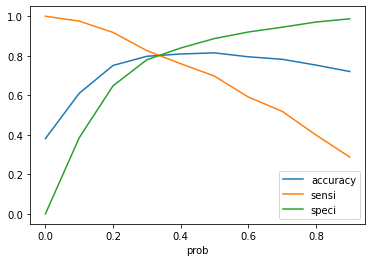

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.610390  0.975264  0.385557
0.2   0.2  0.751082  0.918086  0.648176
0.3   0.3  0.797464  0.826034  0.779860
0.4   0.4  0.809060  0.759935  0.839330
0.5   0.5  0.814780  0.697080  0.887306
0.6   0.6  0.794836  0.591241  0.920290
0.7   0.7  0.782313  0.519059  0.944528
0.8   0.8  0.752938  0.399432  0.970765
0.9   0.9  0.720315  0.287510  0.987006


In [89]:
# Mapping the graphs - > It appears that the cutoff should be 0.30
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()
print(cutoff_df)

In [90]:
def draw_roc( act, prb ):
    fpr, tpr, thresholds = metrics.roc_curve( act, prb ,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( act, prb )
    print("Area under the ROC curve is ->",auc_score)
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'go--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    return None

Area under the ROC curve is -> 0.8849802592620963


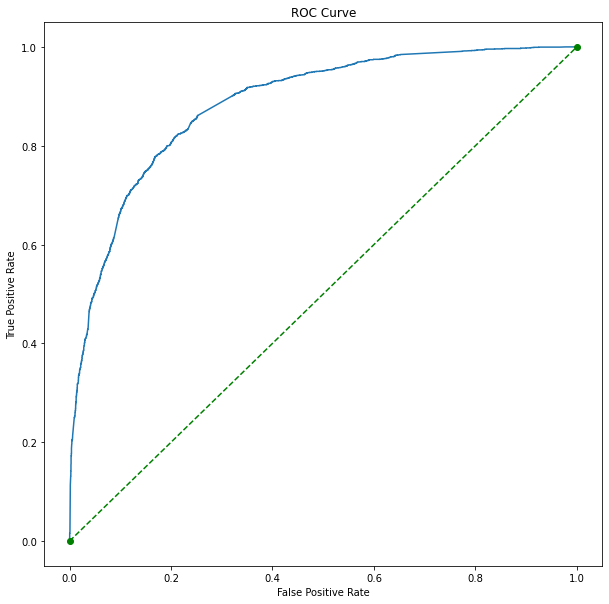

In [91]:
#The area under the curve is showing that the model is performing good
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [92]:
# Importing precision and recall score from the sklearn.metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score


In [93]:
p,r,thr=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

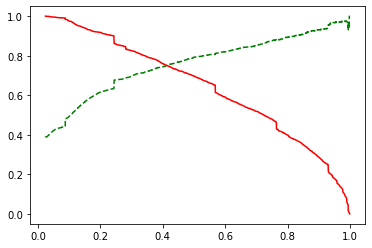

In [94]:
# For us the important measure is the recall and we want to be as high as possible
plt.plot(thr,p[:-1],"g--")
plt.plot(thr,r[:-1],"r")
plt.show()

In [95]:
# As we want the recall score to be as high as possible let us do it with 
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    print('For',100*i,'% Cutoff','Recall Score is',round(recall_score(y_train_pred_final.Converted,y_train_pred_final[i]),2),'Precision Score is',round(precision_score(y_train_pred_final.Converted,y_train_pred_final[i]),2))

For 0.0 % Cutoff Recall Score is 1.0 Precision Score is 0.38
For 10.0 % Cutoff Recall Score is 0.98 Precision Score is 0.49
For 20.0 % Cutoff Recall Score is 0.92 Precision Score is 0.62
For 30.0 % Cutoff Recall Score is 0.83 Precision Score is 0.7
For 40.0 % Cutoff Recall Score is 0.76 Precision Score is 0.74
For 50.0 % Cutoff Recall Score is 0.7 Precision Score is 0.79
For 60.0 % Cutoff Recall Score is 0.59 Precision Score is 0.82
For 70.0 % Cutoff Recall Score is 0.52 Precision Score is 0.85
For 80.0 % Cutoff Recall Score is 0.4 Precision Score is 0.89
For 90.0 % Cutoff Recall Score is 0.29 Precision Score is 0.93


In [96]:
# As we do not want to miss any customers where we have good possibility of conversion we take cut off as 25%
#This will also give us better sensitivity
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.25 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.242969,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.214100,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.312908,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.835245,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.242969,0,1,1,1,0,0,0,0,0,0,0,0


#### Evaluation on Train Data

In [97]:
# Checking accuracy , Recall and Precision
print('Accuracy score for train data is ',round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2))
print('Recall score for train data is ',round(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2))
print('Precision score for train data is ',round(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2))
print('F1 score for train data is ',round(f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2))

Accuracy score for train data is  0.79
Recall score for train data is  0.86
Precision score for train data is  0.68
F1 score for train data is  0.76


In [98]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2994, 1008],
       [ 350, 2116]], dtype=int64)

In [99]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [100]:
# Calculating the sensitivity
TP/(TP+FN)

0.8580697485806975

In [101]:
# Calculating the specificity
TN/(TN+FP)

0.7481259370314842

#### Evaluation on Test Data

In [102]:
# Scaling the data
X_test[varlist]=Scaler.transform(X_test[varlist])
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)

In [103]:
# using the 5th model to predict the test data
y_test_pred = res5.predict(X_test_sm)

In [104]:
#Again, As we do not want to miss any customers where we have good possibility of conversion we take cut off as 25%
#This will also give us better sensitivity
y_test_pred=y_test_pred.values.reshape(-1)
y_test_pred=pd.DataFrame({'Converted':y_test.values,'Converted_Prob':y_test_pred})
y_test_pred['Predicted']=y_test_pred.Converted_Prob.map(lambda x:1 if x>0.25 else 0)
y_test_pred.head(10)

,Converted,Converted_Prob,Predicted
0,1,0.513525,1
1,1,0.929865,1
2,1,0.929899,1
3,0,0.242969,0
4,1,0.763946,1
5,1,0.602275,1
6,1,0.445002,1
7,1,0.146049,0
8,0,0.055835,0
9,1,0.360838,1


In [105]:
confusion3 = metrics.confusion_matrix(y_test_pred.Converted, y_test_pred.Predicted)
confusion3

array([[1265,  412],
       [ 149,  946]], dtype=int64)

In [106]:
# Check the overall accuracy, recall and precision score
print('Accuracy score for test data is ',round(metrics.accuracy_score(y_test_pred.Converted, y_test_pred.Predicted),2))
print('Recall score for test data is ',round(recall_score(y_test_pred.Converted, y_test_pred.Predicted),2))
print('Precision score for test data is ',round(precision_score(y_test_pred.Converted, y_test_pred.Predicted),2))
print('F1 score for test data is ',round(f1_score(y_test_pred.Converted, y_test_pred.Predicted),2))

Accuracy score for test data is  0.8
Recall score for test data is  0.86
Precision score for test data is  0.7
F1 score for test data is  0.77


#### Adding the score variable

In [107]:
# We are taking the base data that we took for train test split and we will predict on it
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Missing Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing Occupation,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [108]:
# Scaling the data
X[varlist]=Scaler.fit_transform(X[varlist])
X=X[col]
X_sm=sm.add_constant(X)

In [109]:
# Prediction on all data
y_pred=res5.predict(X_sm)
y_pred=pd.DataFrame(round(y_pred*100,0),columns=['Score'])
y_pred.head()

,Score
0,24.0
1,29.0
2,68.0
3,15.0
4,63.0


In [110]:
#Importing original data frame again
df = pd.read_csv("Leads.csv")

In [111]:
#Joining the prediction and the main data frame on the index
df=pd.merge(df,y_pred,left_index=True,right_index=True,how='inner')

In [112]:
# The data set with the score variable
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,24.0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,29.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,68.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,15.0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,63.0


In [113]:
#Adding new column of predicted to it
df["Predicted"]=df.Score.apply(lambda x:1 if x>25 else 0)

In [114]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Score,Predicted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,24.0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,29.0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,68.0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,15.0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,63.0,1


In [115]:
# Check the overall accuracy, recall and precision score
print('Accuracy score for All data is ',round(metrics.accuracy_score(df.Converted, df.Predicted),2))
print('Recall score for All data is ',round(recall_score(df.Converted, df.Predicted),2))
print('Precision score for All data is ',round(precision_score(df.Converted, df.Predicted),2))
print('F1 score for All data is ',round(f1_score(df.Converted, df.Predicted),2))

Accuracy score for All data is  0.79
Recall score for All data is  0.86
Precision score for All data is  0.68
F1 score for All data is  0.76
